In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sktime.transformations.panel.dictionary_based import PAA
from sktime.transformations.series.sax import SAX2

from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler

from sktime.transformations.series.detrend import Detrender
from sktime.transformations.series.detrend import Deseasonalizer
from sktime.pipeline import make_pipeline
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

from sktime.distances import distance
from tslearn.metrics import dtw as tsldtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from sklearn.metrics import pairwise_distances

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import LeaveOneOut
from dtaidistance import dtw

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sktime.clustering.k_means import TimeSeriesKMeans
from tslearn.clustering import silhouette_score

In [2]:
df_no_duplicates = pd.read_csv('tsdf_no_duplicates.csv')

In [3]:
ts9864 = df_no_duplicates.iloc[:,:-2].values
ts9864.shape

(9864, 1280)

In [4]:
paa = PAA(num_intervals=256)

def approximate(ts):
    ts_paa = paa.fit_transform(ts)
    return ts_paa

transformed_time_series = []
for ts in ts9864:
    transformed_time_series.append(approximate(ts))
    
ts9864_256 = np.array(transformed_time_series)
ts9864_256 = ts9864_256.reshape(9864, 256)

In [5]:
def dtw_25(ts1,ts2):
    distance = tsldtw(ts1,ts2, sakoe_chiba_radius = 25 )
    return distance

In [7]:
cluster = TimeSeriesKMeans(n_clusters=7, metric = dtw_25, n_init=20, random_state=42)
cluster.fit(ts9864_256)
labels = cluster.labels_
distance_matrix = np.load('matrix_9864_256_dtw25.npy')
sil_score = silhouette_score(distance_matrix, labels, metric = 'precomputed')
cluster.inertia_

82208338.20223196

In [9]:
np.save('labels_kmeans_7.npy', labels)

In [10]:
sil_score

0.12806369964275383

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(ts9864)

Text(0, 0.5, 'Principal Component 2')

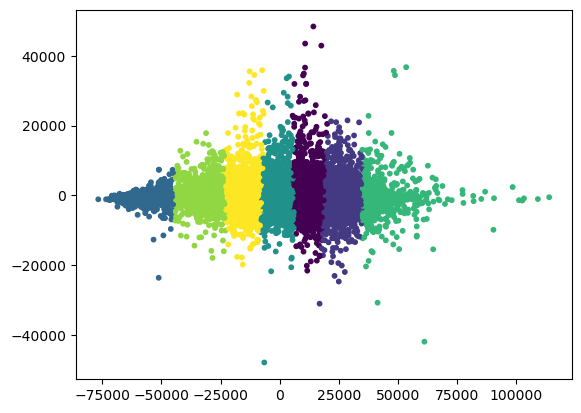

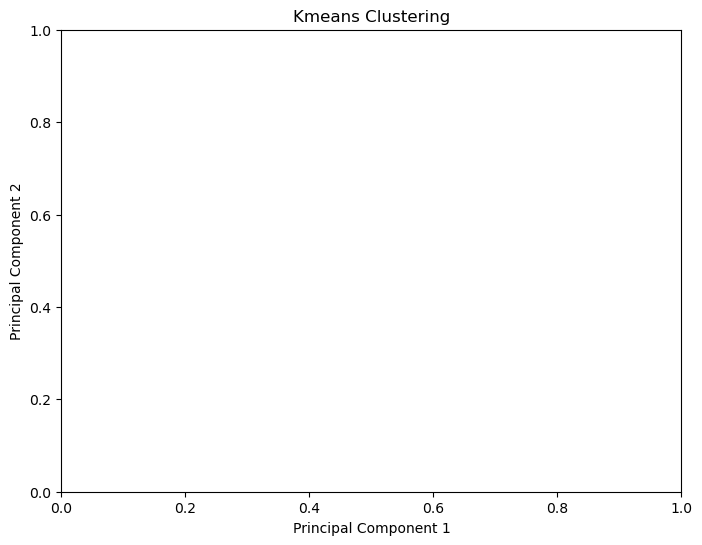

In [14]:

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', s=10)

plt.figure(figsize=(8, 6))
plt.title('Kmeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [15]:
labels

array([4, 3, 2, ..., 3, 2, 2], dtype=int64)

In [16]:
df_no_duplicates['cluster']=labels

In [17]:
df_no_duplicates

,0,1,2,3,4,5,6,7,8,9,...,1273,1274,1275,1276,1277,1278,1279,genre,ids,cluster
0,4033.983233,4452.531825,4493.084636,4205.104114,4124.152380,4374.528603,4218.922430,4811.479415,5380.497768,5408.836533,...,4515.116157,4272.059542,3179.082991,3119.379434,3163.797698,3135.170030,3470.557808,happy,002qpSULhHAw6DGqFxbaO1,4
1,1246.782278,1275.037576,1389.825458,1425.923045,1453.146435,1439.394669,1446.677260,1452.278668,1562.862604,1716.595733,...,2427.495847,4272.999098,4756.297360,3155.547176,2652.793629,2693.680737,2600.652552,emo,004h8smbIoAkUNDJvVKwkG,3
2,556.527371,570.688219,632.791952,724.284541,700.265785,637.978949,580.044365,541.837395,538.979271,561.738058,...,600.108454,568.681377,537.072023,536.968066,549.719850,575.656227,565.242703,world-music,006ATYzgynEKIPgVaT5LQM,2
3,2318.553884,2415.404641,2587.678594,2679.752782,2476.585990,2354.537616,2351.667896,2319.100690,2417.571585,2431.619017,...,2435.225332,2516.305110,2457.247966,2398.038946,2382.307384,2390.305834,2520.164300,heavy-metal,00C93bsNIjHStKvr1lPJee,0
4,2197.095845,2299.780004,2340.115366,2230.133271,2162.143986,2060.925716,2085.023936,2122.772450,2095.381438,2073.004571,...,2036.814810,2283.750682,2403.766504,2551.391082,2413.472908,2248.364802,2249.086879,progressive-house,00CsDW3I9XueUvaXnAvGMm,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9859,2714.675059,2273.567285,1794.152523,1461.596435,1486.842231,1576.816447,1656.734425,1676.028261,1779.922921,1737.991497,...,2639.636103,2594.053748,2520.841825,2592.052944,2631.374097,2830.008571,2531.497095,synth-pop,7zmbtfKgZMTQ1GlqBno5T5,0
9860,618.054847,620.631310,612.652137,636.176379,635.752477,631.399916,605.110771,626.046116,624.747279,591.403780,...,551.268466,539.168279,529.838171,567.515093,588.830356,559.373196,558.468585,piano,7zP20CANb26S52imHKKWEc,2
9861,2302.092948,2354.562900,2498.050464,2485.572104,2368.360732,2397.476901,2450.164601,2463.453644,2638.358828,2428.885493,...,2057.341857,2309.620417,2334.191132,2324.397193,2277.928664,2288.184316,2237.393099,world-music,7zvGj5jjRIBRqT82crTMVf,3
9862,277.987301,284.186192,294.089063,290.958406,289.316498,298.456330,300.274822,299.111098,301.967315,300.353719,...,285.405406,281.218507,277.622963,295.527480,286.623827,276.994329,260.720517,sleep,7zwddyEol0Hg5K8HQd3srX,2


In [22]:
df_no_duplicates['cluster'].value_counts()

0    2277
3    1963
1    1735
6    1492
5     927
2     836
4     634
Name: cluster, dtype: int64

In [23]:
# Raggruppa per cluster e conta i generi
cluster_counts = df_no_duplicates.groupby('cluster')['genre'].value_counts()

# Stampa i risultati
for cluster, count in cluster_counts.iteritems():
    print(f"Cluster {cluster}: {count} genres")

Cluster (0, 'heavy-metal'): 249 genres
Cluster (0, 'salsa'): 208 genres
Cluster (0, 'sertanejo'): 192 genres
Cluster (0, 'goth'): 175 genres
Cluster (0, 'emo'): 174 genres
Cluster (0, 'world-music'): 164 genres
Cluster (0, 'synth-pop'): 159 genres
Cluster (0, 'j-idol'): 157 genres
Cluster (0, 'kids'): 150 genres
Cluster (0, 'progressive-house'): 142 genres
Cluster (0, 'minimal-techno'): 109 genres
Cluster (0, 'mpb'): 100 genres
Cluster (0, 'folk'): 69 genres
Cluster (0, 'happy'): 66 genres
Cluster (0, 'songwriter'): 48 genres
Cluster (0, 'honky-tonk'): 33 genres
Cluster (0, 'opera'): 27 genres
Cluster (0, 'sleep'): 23 genres
Cluster (0, 'piano'): 22 genres
Cluster (0, 'new-age'): 10 genres
Cluster (1, 'j-idol'): 222 genres
Cluster (1, 'happy'): 211 genres
Cluster (1, 'progressive-house'): 192 genres
Cluster (1, 'heavy-metal'): 147 genres
Cluster (1, 'kids'): 135 genres
Cluster (1, 'salsa'): 134 genres
Cluster (1, 'synth-pop'): 133 genres
Cluster (1, 'emo'): 120 genres
Cluster (1, 'goth

C:\Users\emasc\AppData\Local\Temp\ipykernel_12640\840492536.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cluster, count in cluster_counts.iteritems():


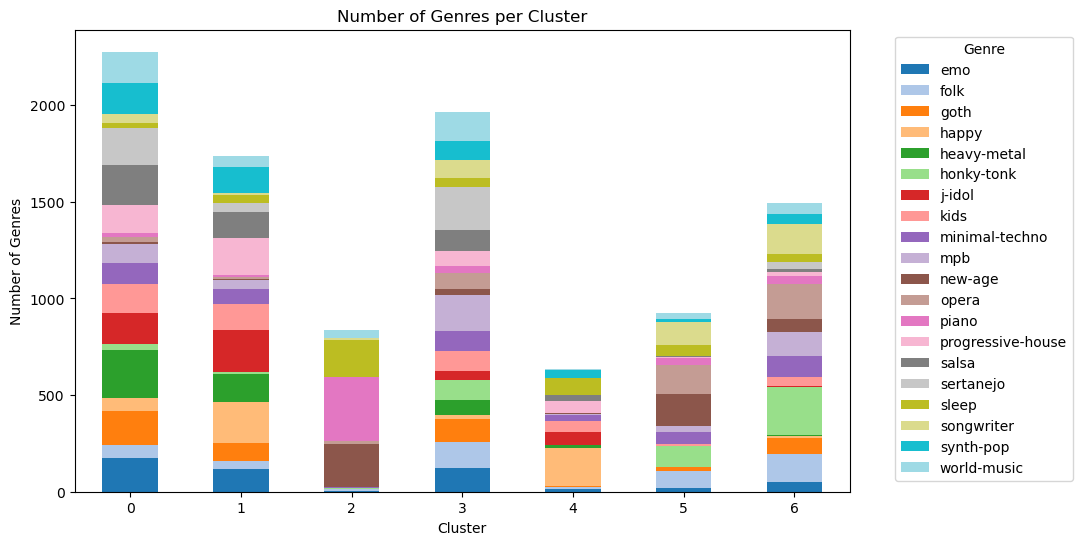

In [30]:
cluster_counts = df_no_duplicates.groupby(['cluster', 'genre']).size().unstack(fill_value=0)

# Plot dei generi per cluster
colors = plt.cm.tab20.colors
ax = cluster_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.xlabel('Cluster')
plt.ylabel('Number of Genres')
plt.title('Number of Genres per Cluster')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks(rotation=0)
plt.show()

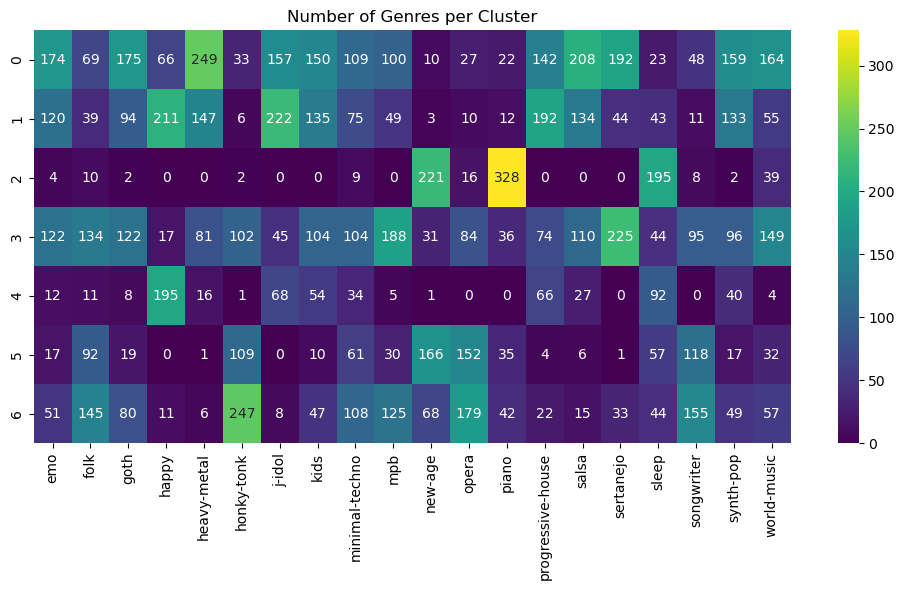

In [39]:
cluster_counts = df_no_duplicates.groupby(['cluster', 'genre']).size().unstack(fill_value=0)

# Plot della matrice dei generi per cluster con gradiente di colori
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_counts.values, cmap='viridis', annot=True, fmt='g')
plt.title('Number of Genres per Cluster')
plt.xticks([x + 0.5 for x in range(len(cluster_counts.columns))], cluster_counts.columns, rotation=90, ha='center')
plt.yticks([y + 0.5 for y in range(len(cluster_counts.index))], cluster_counts.index, va='center')
plt.tight_layout()
plt.show()